# Stochastic processes: basic examples

https://en.wikipedia.org/wiki/Fokker%E2%80%93Planck_equation

https://en.wikipedia.org/wiki/Ornstein%E2%80%93Uhlenbeck_process

In [2]:
# numpy
import numpy as np
np.random.seed(1234)
from numpy.random import default_rng
rng = default_rng()

# import functions
from numpy import log, log10, sin, cos, exp, sqrt, pi

# plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# progress bar
from tqdm.notebook import tqdm
from tqdm import trange
from time import sleep
from tqdm import tqdm

# warnings
import warnings
warnings.simplefilter('ignore')

import pandas as pd

def arraycenter(x):
    """
    returns centered array for histograms
    """
    return [(x[i]+x[i+1])/2 for i in range(len(x)-1)]

100%|██████████| 1000/1000 [00:00<00:00, 1713.15it/s]


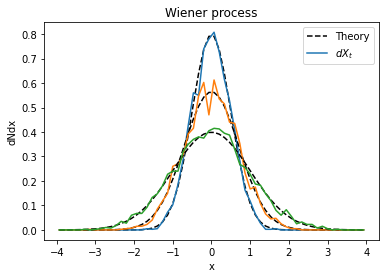

In [3]:
# Wiener process
nbins = 60
Nsmpl = int(3e3)
tdim = int(1e3)
tmax = 1
dt = tmax/tdim

# diffusion equation analytical solution
def fWienerSol(t,x):
    return 1/sqrt(2*pi*t) * exp(-0.5*x**2/t)

xdist = np.zeros(Nsmpl)
xsnaps = np.zeros((tdim,nbins))
xmax = sqrt(tmax)*4
xbins0 = np.linspace(-xmax,+xmax,nbins+1)

# for each time step
for t in tqdm(range(tdim)):

    # Gaussian random number
    dW = sqrt(dt) * np.random.randn(Nsmpl)

    # Wiener process only has dW
    dx = dW

    # update coordinate Euler-Maruyama
    xdist = xdist + dx
    
    # get histogram
    xdist_y, xdist_x = np.histogram(xdist,xbins0)
    xsnaps[t,:], xbins = xdist_y, np.array(arraycenter(xdist_x))
    
# plot results
t = int(tdim/4)
plt.plot(xbins, fWienerSol(t*dt,xbins), 'k--', label=r'Theory' )
plt.plot(xbins, xsnaps[t,:]/Nsmpl/(xbins[1]-xbins[0]), label=r'$dX_t$' )
t = int(tdim/2)
plt.plot(xbins, fWienerSol(t*dt,xbins), 'k--')
plt.plot(xbins, xsnaps[t,:]/Nsmpl/(xbins[1]-xbins[0]) )
t = int(tdim-1)
plt.plot(xbins, fWienerSol(t*dt,xbins), 'k--')
plt.plot(xbins, xsnaps[t,:]/Nsmpl/(xbins[1]-xbins[0]) )
plt.xlabel(r'x')
plt.ylabel(r'dNdx')
plt.title(r'Wiener process')
plt.legend()
plt.show()

100%|██████████| 1000/1000 [00:00<00:00, 2175.22it/s]


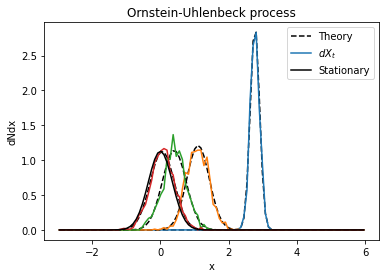

In [9]:
# Ornstein-Uhlenbeck process
nbins = 100
Nsmpl = int(1e3)
tdim = int(1e3)
tmax = 1
dt = tmax/tdim
a = 4
s = 1
x0 = 3

# diffusion equation analytical solution
def fOrnUhlenSol(t,x,a,s):
    D = s**2/2
    return sqrt(a/(2*pi*D*(1-exp(-2*a*t)))) * exp(-0.5*a/D * (x-x0*exp(-a*t))**2 / (1-exp(-2*a*t)) )
def fOrnUhlenSol_ss(x,a,s):
    return sqrt(a/pi/s**2) * exp(-a*x**2/s**2)

xdist = np.zeros(Nsmpl)+x0
xsnaps = np.zeros((tdim,nbins))
xmax = sqrt(tmax)*4
xbins0 = np.linspace(-x0,2*x0,nbins+1)

# for each time step
for t in tqdm(range(tdim)):

    # Gaussian random number
    dW = sqrt(dt) * np.random.randn(Nsmpl)

    # Ornstein-Uhlenbeck has drift and diffusion
    dx = -a*xdist*dt + s*dW

    # update coordinate Euler-Maruyama
    xdist = xdist + dx
    
    # get histogram
    xdist_y, xdist_x = np.histogram(xdist,xbins0)
    xsnaps[t,:], xbins = xdist_y, np.array(arraycenter(xdist_x))
    
# plot results
t = int(tdim/50)
plt.plot(xbins, fOrnUhlenSol(t*dt,xbins,a,s), 'k--', label=r'Theory' )
plt.plot(xbins, xsnaps[t,:]/Nsmpl/(xbins[1]-xbins[0]), label=r'$dX_t$' )
t = int(tdim/4)
plt.plot(xbins, fOrnUhlenSol(t*dt,xbins,a,s), 'k--')
plt.plot(xbins, xsnaps[t,:]/Nsmpl/(xbins[1]-xbins[0]))
t = int(tdim/2)
plt.plot(xbins, fOrnUhlenSol(t*dt,xbins,a,s), 'k--')
plt.plot(xbins, xsnaps[t,:]/Nsmpl/(xbins[1]-xbins[0]))
t = int(tdim-1)
plt.plot(xbins, fOrnUhlenSol(t*dt,xbins,a,s), 'k--')
plt.plot(xbins, xsnaps[t,:]/Nsmpl/(xbins[1]-xbins[0]))
plt.plot(xbins, fOrnUhlenSol_ss(xbins,a,s), 'k-', label=r'Stationary' )
plt.xlabel(r'x')
plt.ylabel(r'dNdx')
plt.title(r'Ornstein-Uhlenbeck process')
plt.legend()
plt.show()